# Refocus Final Project
By: Rainville Q. Tobias | 
Cohort Number 37
<br>

Jupyter Notebook

NOTE: To fully use this notebook, we suggest installing these libraries first or use the conda environment that is included in the link.
* Geopandas and dependencies
* pandas, numpy, matplotlib, seaborn

Geopandas:
conda install shapely --channel conda-forge
<br>
conda install -c "conda-forge/label/broken" fiona
<br>
conda install -c "conda-forge/label/broken" pyproj
<br>
conda install -c conda-forge geopandas

I'm using python 3.8.16

## Context

This analysis examines data from a startup company in Los Angeles, California, aiming to expand its **health tracker smartwatch business** to other states. By analyzing various factors, including competitor data and state income, we aim to identify the states with the highest growth potential for the company. Out of the 50 states, we will provide key points highlighting why selecting specific states would be advantageous for the company's expansion.

## Data Preprocessing (For Guided Tasks)

Standard imports

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns
import shapely
import warnings

Creating a dataframe from csv file extracted from database.

In [3]:
df_income = pd.read_csv('data\state_income_data_csv.csv')
df_income.head()

,state_usa,average_income,minimum_income,maximum_income,convictions_per_capita,income percentage,convictions percentage
0,West Virginia,46254,21967,85459,5.64,1.50%,6.70%
1,Mississippi,47131,22732,81693,2.43,1.50%,2.90%
2,New Mexico,48701,23313,78605,2.14,1.50%,2.50%
3,Arkansas,48829,23028,90052,3.02,1.50%,3.60%
4,Kentucky,50675,23915,88278,1.60,1.60%,1.90%


### Set 1, Task 1 of Guided Tasks

Scatter plot of state income vs convictions per capita.

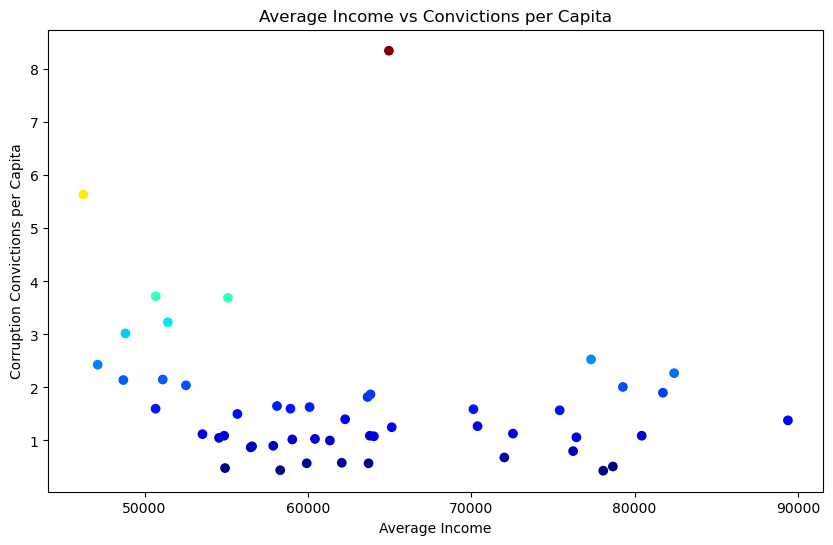

In [4]:
# Create the scatter plot
fig, ax = plt.subplots(figsize = (10,6))

scatter = ax.scatter(df_income['average_income'], df_income['convictions_per_capita'], 
                      c=df_income['convictions_per_capita'], cmap='jet')
ax.set_xlabel("Average Income")
ax.set_ylabel("Corruption Convictions per Capita")
ax.set_title("Average Income vs Convictions per Capita")

plt.show()

Let's add some more details for better visualization.

In [5]:
# minimum and the maximum convictions per capita from df_income dataframe
min_convictions = min(df_income['convictions_per_capita'])
max_convictions = max(df_income['convictions_per_capita'])

# tuple of lowest income and corresponding convictions per capita
lowest_income_coords = (df_income['average_income'].min(),
                 df_income.loc[df_income['average_income'].idxmin(), 'convictions_per_capita'])
highest_income_coords = (df_income['average_income'].max(),
                  df_income.loc[df_income['average_income'].idxmax(), 'convictions_per_capita'])

# tuple of lowest convictions per capita and corresponding income
lowest_convictions_coords = (df_income['average_income'].iloc[df_income['convictions_per_capita'].idxmin()],
                df_income['convictions_per_capita'].min())
highest_convictions_coords = (df_income['average_income'].iloc[df_income['convictions_per_capita'].idxmax()],
                 df_income['convictions_per_capita'].max())

# corresponding states for lowest or highest income and convictions per capita
    # convictions per capita
state_lowest_convictions = df_income.loc[df_income['convictions_per_capita'] == lowest_convictions_coords[1], 'state_usa'].values[0]
state_highest_convictions = df_income.loc[df_income['convictions_per_capita'] == highest_convictions_coords[1], 'state_usa'].values[0]

    # average income
state_lowest_income = df_income.loc[df_income['average_income'] == lowest_income_coords[0], 'state_usa'].values[0]
state_highest_income = df_income.loc[df_income['average_income'] == highest_income_coords[0], 'state_usa'].values[0]

# colors in the cmap we used (jet)
lowest_color = plt.cm.jet((df_income['convictions_per_capita'].min() - lowest_convictions_coords[1]) / (highest_convictions_coords[1] - lowest_convictions_coords[1]))
highest_color = plt.cm.jet((df_income['convictions_per_capita'].max() - lowest_convictions_coords[1]) / (highest_convictions_coords[1] -lowest_convictions_coords[1]))

Now that all the values we need are stored in each variable, let's use them to annotate the scatter plot.

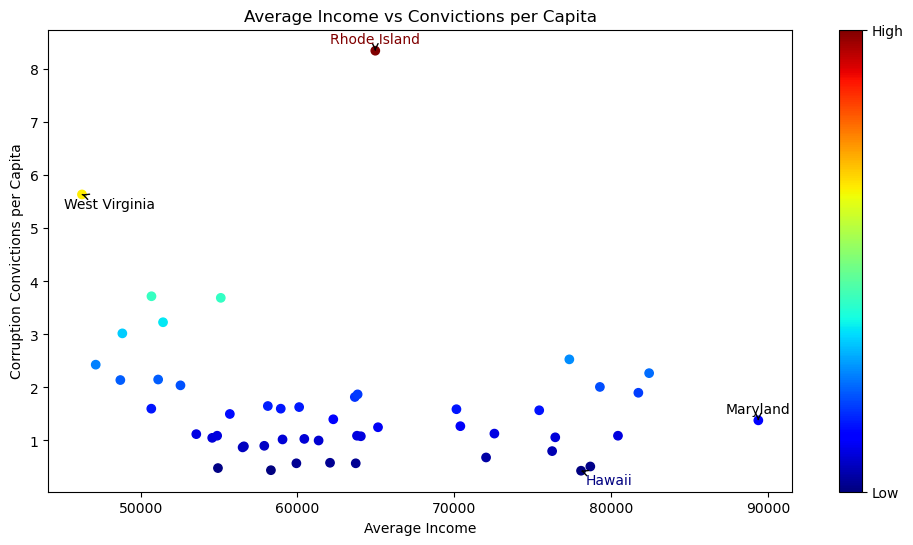

In [6]:
# Create the scatter plot
fig, ax = plt.subplots(figsize = (12,6))

scatter = ax.scatter(df_income['average_income'], df_income['convictions_per_capita'], 
                      c=df_income['convictions_per_capita'], cmap = 'jet')
ax.set_xlabel("Average Income")
ax.set_ylabel("Corruption Convictions per Capita")
ax.set_title("Average Income vs Convictions per Capita")


# Annotations
    #conviction per capita
ax.annotate(state_lowest_convictions, xy=lowest_convictions_coords, xytext=(20, -10), #xytext(x,y)
             textcoords="offset points", ha='center', color=lowest_color,
             arrowprops=dict(arrowstyle='->', color='black'))

ax.annotate(state_highest_convictions, xy=highest_convictions_coords, xytext=(0, 5),
              textcoords="offset points", ha='center', color=highest_color,
              arrowprops=dict(arrowstyle='->', color='black'))

    # average income
ax.annotate(state_lowest_income, xy=lowest_income_coords, xytext=(20, -10),
             textcoords="offset points", ha='center', color='black',
             arrowprops=dict(arrowstyle='->', color='black'))

ax.annotate(state_highest_income, xy=highest_income_coords, xytext=(0, 5),
              textcoords="offset points", ha='center', color='black',
              arrowprops=dict(arrowstyle='->', color='black'))

# Color bar
cbar = fig.colorbar(ax.collections[0], ax=ax, cmap = 'jet')
cbar.set_label('')
cbar.set_ticks([lowest_convictions_coords[1], highest_convictions_coords[1]])
cbar.set_ticklabels(['Low', 'High'])


# plt.savefig('images/set1_task1.png', bbox_inches='tight')
plt.show();

Extra: Table of all state and their average income and convictions per capita

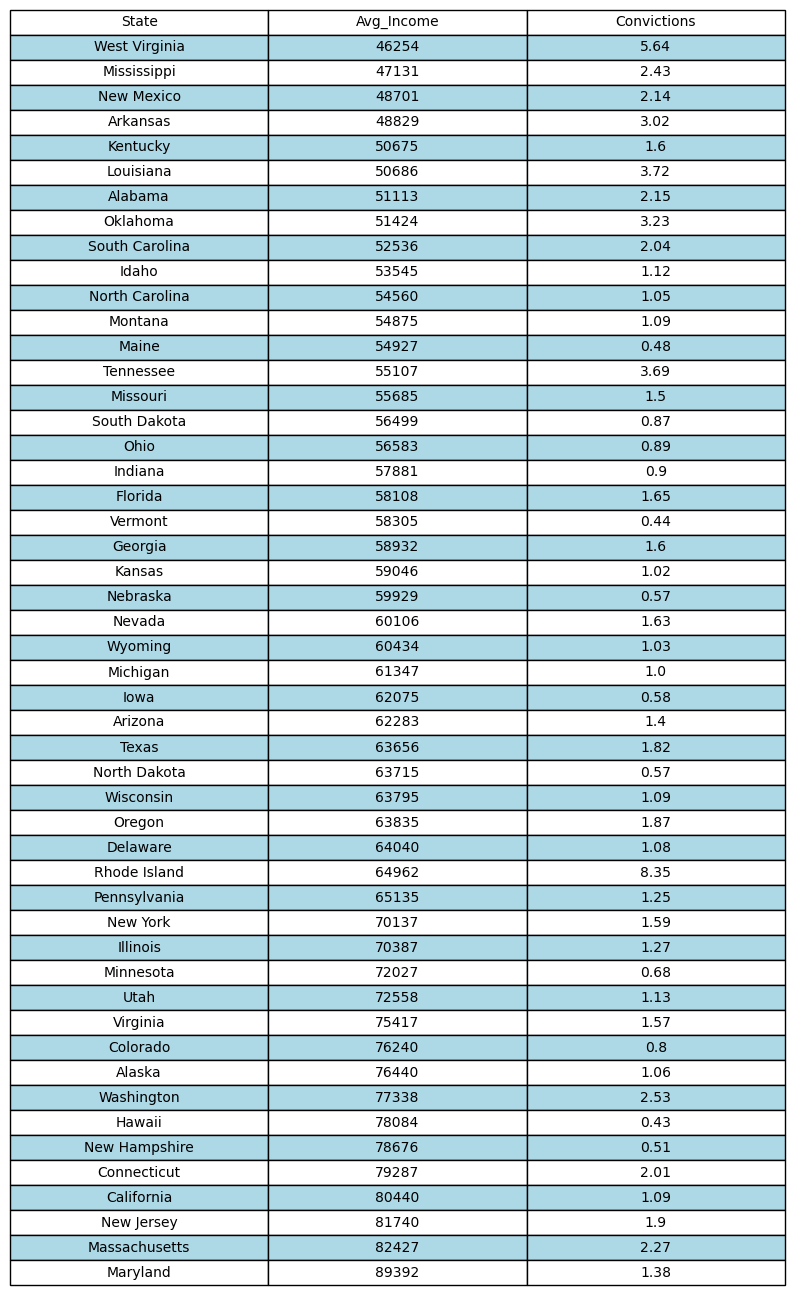

In [7]:
# Create a figure with two subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Color-coded table
table_data = df_income[['state_usa', 'average_income', 'convictions_per_capita']].values
col_labels = ['State', 'Avg_Income', 'Convictions']

table = ax.table(cellText=table_data, 
                  colLabels=col_labels, 
                  cellLoc='center', 
                  loc='center')

# Table properties
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)

# Add alternating colors to the table rows
colors = ['lightblue', 'white']
for i in range(0, len(table_data)):
    for j in range(len(col_labels)):
        table[(i + 1), j].set_facecolor(colors[i % 2])

ax.axis('off')

# plt.savefig('images/set1_task1_2.png', bbox_inches='tight')

plt.show()

Because the company is considering to expand business, we want to list the top choices based on average income and conviction per capita.

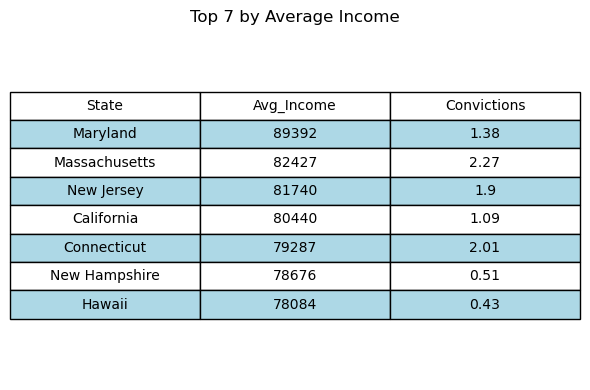

In [8]:
# Sort the DataFrame
sorted_data = df_income.sort_values('average_income', ascending=False)

# Select the 7 highest average income
top_7_data = sorted_data.head(7)

# Create the table
table_data = top_7_data[['state_usa', 'average_income', 'convictions_per_capita']].values
columns = ['State', 'Avg_Income', 'Convictions']

fig, ax = plt.subplots(figsize=(6, 4))
table = ax.table(cellText=table_data,
                 colLabels=columns,
                 cellLoc='center',
                 loc='center')
# To be used later
top7 = fig

# Table properties
table.auto_set_font_size(True)
table.set_fontsize(10)
table.scale(1, 1.5)

# Table colors
colors = ['lightblue', 'white']
for i in range(0, len(table_data)):
    for j in range(len(col_labels)):
        table[(i + 1), j].set_facecolor(colors[i % 2])

ax.axis('off')
plt.title("Top 7 by Average Income")
plt.tight_layout()

# plt.savefig('images/set1_task1_3.png', bbox_inches='tight')

plt.show()

In this Task, scatter plot shows that **Rhode Island** has the highest convictions per capita while **Hawaii** has the lowest. The plot also shows that **Maryland** has the highest average income while sitting at a low convictions per capita while the state with the lowest average income, **West Virginia**, has a moderately high convictions per capita.

### Set 1, Task 2 of Guided Tasks
Correlation between state income and convictions per capita

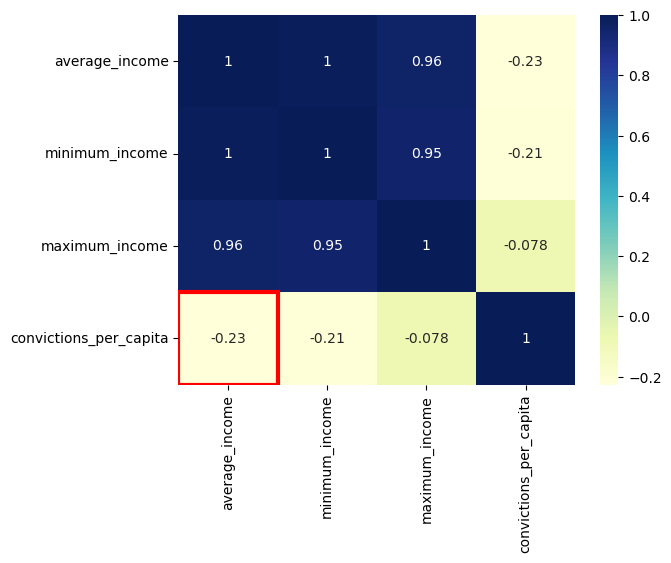

In [9]:
# Create correlation data
corr_data = df_income.corr(numeric_only = True)

# Correlation Matirx, Yellow-Green-Blue color map
corr_mat = sns.heatmap(corr_data, cmap = 'YlGnBu', annot = True)

# add a border to index x=0, y=3
corr_mat.add_patch(plt.Rectangle((0, 3), 1, 1, fill=False, edgecolor='red', lw=3))

# plt.savefig('images/set1_task2.png', bbox_inches='tight')

plt.show();

The correlation between average income and convictions per capita is **-0.23**. A negative correlation signifies that when average income increases, convictions per capita decreases or vice versa. But with a value of only (-)0.23, the correlation is weak between the two variables.

### Set 1, Task 3 of Guided Tasks

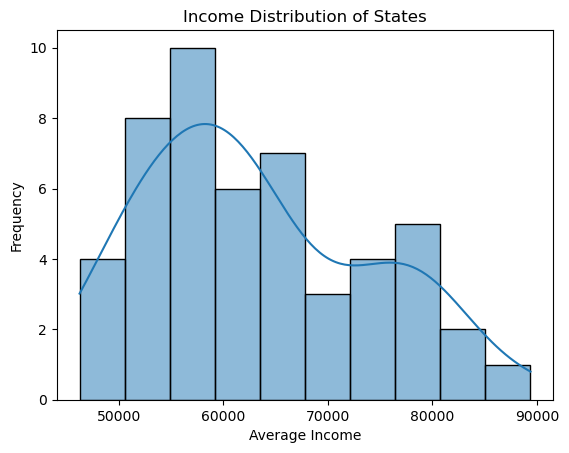

In [10]:
# Histogram with kde from seaborn library
sns.histplot(df_income['average_income'], bins=10, kde=True);

# Customize plot
plt.title("Income Distribution of States")
plt.xlabel('Average Income')
plt.ylabel('Frequency')

# plt.savefig('images/set1_task3.png', bbox_inches='tight')

plt.show();

The average income lies around 50K to 60K. This can give us an idea about the how much can a certain state can spend on purchasing the company's product. We can also use it to develop products that will be priced based on their the income. We can't see outliers with this plot so we could continue with further analysis.

### Initial Analysis

The data tells us that if the company is going to expand business based on income and conviction per capita, our choices would be the following:

* **Maryland**
* **Massachusetts**
* **New Jersey**
* **California**
* **Connecticut**
* **New Hampshire**
* **Hawaii**

Because Hawaii has the fewest convictions per capita while still boasting a high average income, we purposefully included it on our list of seven states. On the other hand, despite having a median income, Rhode Island has the highest conviction rate per capita. This can indicate both that the corruption rate in that state is high and that the authorities there are serious about punishing corrupt offenders. We must thus investigate the connection between income and conviction rate in order to balance the situation.

There is a **weak negative relationship** between average income and the number of convictions per capita, according to a correlation analysis. However, a shaky connection teaches us that one thing "cannot be assumed to cause the other." Therefore, basing business expansion on these factors is not a prudent move.

We discovered the dispersion of the states' average incomes after more investigation. This might be used to target states with greater purchasing power, but in order to support this, we need to compute other business indicators and aspects that could help us make the best decision. So... How do we get at that **"best option"**?

Based on the information we have, we came up with some of the following questions:

* **Which states have the largest potential markets?**
* **What possible ROI may the business expect if it chooses this state?**
* **Does one firm control the market in a certain state?**
* **What are the benefits and drawbacks of picking a particular state?**



## Exploratory Data Analysis - Business Metrics

Import competitors csv file and check for datatypes

In [11]:
df_comp = pd.read_csv('data\competitors.csv')
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   research_development_spent  271 non-null    float64
 1   administration              271 non-null    float64
 2   marketing_spent             271 non-null    float64
 3   state_usa                   271 non-null    object 
 4   profit                      271 non-null    float64
dtypes: float64(4), object(1)
memory usage: 10.7+ KB


In [12]:
df_comp.head()

,research_development_spent,administration,marketing_spent,state_usa,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


The data frame is already in correct datatypes and is already cleaned. Let's start exploring. In this correlation heatmap, we'd like to look at how related the competitor's spending is to their profit.

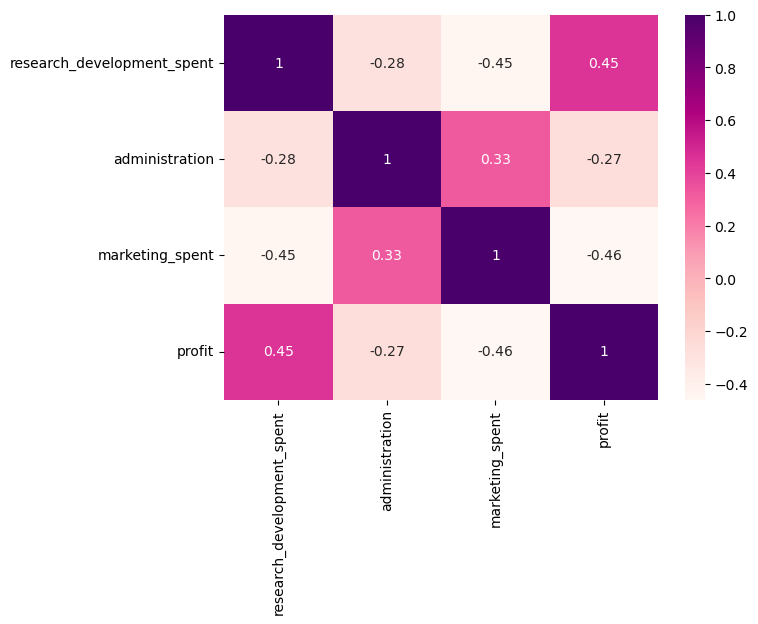

In [13]:
# Create the data
competitors_corr_data = df_comp.corr(numeric_only = True)

# Heatmap
competitors_corr_heatmap = sns.heatmap(competitors_corr_data[['research_development_spent', 
                                                              'administration', 
                                                              'marketing_spent', 
                                                              'profit']], 
                                       cmap = 'RdPu', 
                                       annot = True)

# plot configurations
fig = plt.gcf()
fig.set_size_inches(7, 5)
competitors_corr_heatmap.set_xticklabels(competitors_corr_heatmap.get_xticklabels(), rotation=90)

# plt.savefig('images/correl_mat.png', bbox_inches='tight')

plt.show();

This correlation chart demonstrates that the most important factor in producing profits is **innovation**. Being inventive pays off in the IT and electronics industries. The map also shows us that there is less profit the more money the corporation spends on management or marketing. However, there are other variables that could influence these associations, so we need to do further research and compute additional measures.

### Data Engineering
In this section, we'll use the data we already have to develop new metrics that are useful for the study.

In [14]:
# Refreshing what data we have
df_comp.head()

,research_development_spent,administration,marketing_spent,state_usa,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [15]:
df_income.head()

,state_usa,average_income,minimum_income,maximum_income,convictions_per_capita,income percentage,convictions percentage
0,West Virginia,46254,21967,85459,5.64,1.50%,6.70%
1,Mississippi,47131,22732,81693,2.43,1.50%,2.90%
2,New Mexico,48701,23313,78605,2.14,1.50%,2.50%
3,Arkansas,48829,23028,90052,3.02,1.50%,3.60%
4,Kentucky,50675,23915,88278,1.60,1.60%,1.90%


Let's combine df_income to df_comp using left join.

In [16]:
# columns from df_income that will be merged to df_comp
columns = ['state_usa', 'average_income', 'convictions_per_capita']

# check before merging:
if not all(col in df_comp.columns for col in columns):
    df_comp = pd.merge(df_comp, df_income[columns], on='state_usa', how='left')


After merging some columns to the df_comp dataframe, we can now add calculated columns. Here's some of the metrics we have in mind:

* Total spending = sum of R&D, administration and marketing
* Profitability = when profit is divided by the total spending
* Market Share = what part of the total profit of the industry is of this competitor?
* Marketing efficiency =  ratio of profit and the marketing spent

In [17]:
# Calculated columns
df_comp['total_spent'] = df_comp['research_development_spent'] + df_comp['administration'] + df_comp['marketing_spent']
df_comp['profitability'] = (df_comp['profit'] / df_comp['total_spent']).round(2)
df_comp['market_share'] = ((df_comp['profit']/df_comp['profit'].sum()) * 100).round(3)
df_comp['marketing_efficiency'] = df_comp['profit'] / df_comp['marketing_spent']

# Not yet sure about this
#df_comp['relative_income'] = df_comp['profit']/df_comp['average_income']

There might be competitors that didn't spend any which might produce errors in the calculated columns. Let's check for them.

In [18]:
df_comp['marketing_efficiency'].min(), df_comp['marketing_efficiency'].max(), df_comp['market_share'].min(),df_comp['market_share'].max(),

(0.1665713274271471, inf, 0.005, 0.928)

The maximum value in marketing_efficiency column was infinite or inf. This is the result when the divisor, i.e marketing spent is 0. We don't want any of those in our data, so we'll just replace them with 0.

In [19]:
# replace inf with NaN
df_comp.replace([np.inf, -np.inf], np.nan, inplace=True)

# Then we fill those NaN with 0
df_comp = df_comp.fillna(0)

# Check again
df_comp['marketing_efficiency'].min(), df_comp['marketing_efficiency'].max(), df_comp['market_share'].min(),df_comp['market_share'].max(),

(0.0, 95.35940154823344, 0.005, 0.928)

Now we will create another dataframe that will be dedicated for market that can give us various situations in the market. Let's first store data that will later be merged or used to the `market` dataframe.

In [20]:
# Store aggregated columns into variables
marketing_efficiency_avg = df_comp.groupby('state_usa')['marketing_efficiency'].mean().to_frame().reset_index()

average_profit = df_comp.groupby('state_usa')['profit'].mean().to_frame().rename(columns = {'profit' : 'average_profit'}).reset_index()

# A separate dataframe containing only average_income of each state
income_df = df_income[['state_usa', 'average_income']]

# Segments based on average income of the states
quantiles = income_df.quantile(q = [0.25, 0.5, 0.75], numeric_only = True)
income_cat = quantiles['average_income'].to_dict()

# helper function to categorize each state
def income_category(average_income, income_cat):
    if average_income <= income_cat[0.25]:
        return 'low income'
    elif average_income <= income_cat[0.5]:
        return 'moderate income'
    elif average_income <= income_cat[0.75]:
        return 'high income'
    else:
        return 'very high income'
        

In [21]:
# New Dataframe for further exploration of market situations

market = df_comp.groupby('state_usa')['profit'].sum().to_frame()
market = market.rename(columns = {'profit' : 'total_competitors_profit'})

# Merging the previosly stored aggregations upon checking if specified column/s exists already
required_columns = ['state_usa', 'convictions_per_capita']
if not all(col in market.columns for col in required_columns):
    market = pd.merge(market, df_income[required_columns], on='state_usa', how='right')

    
if 'marketing_efficiency' not in market.columns:
    market = pd.merge(market, marketing_efficiency_avg[['state_usa', 'marketing_efficiency']],
                     on = 'state_usa',
                     how = 'left')

if 'profit' not in market.columns:
    market = pd.merge(market, average_profit[['state_usa', 'average_profit']],
                     on = 'state_usa',
                     how = 'left')
    
if 'average_income' not in market.columns:
    market = pd.merge(market, income_df[['state_usa', 'average_income']], 
                     on = 'state_usa', 
                     how = 'left')

# There are some competitors that haven't spend any so merged columns became Nan, we replace them with zeros
market = market.fillna(0)


Additional columns for the dataframe

In [22]:
# if profit == 0, then there's no competitor, competition is active otherwise
market['market_status'] = np.where(market['total_competitors_profit'] == 0, 'Untouched Market', 'Active Competition')

# Regions of each state
region_map = {
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New York': 'Northeast',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'Vermont': 'Northeast',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Missouri': 'Midwest',
    'Nebraska': 'Midwest',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'South Dakota': 'Midwest',
    'Wisconsin': 'Midwest',
    'Alabama': 'South',
    'Arkansas': 'South',
    'Florida': 'South',
    'Georgia': 'South',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Mississippi': 'South',
    'North Carolina': 'South',
    'Oklahoma': 'South',
    'South Carolina': 'South',
    'Tennessee': 'South',
    'Texas': 'South',
    'Virginia': 'South',
    'West Virginia': 'South',
    'Alaska': 'West',
    'Arizona': 'West',
    'California': 'West',
    'Colorado': 'West',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Montana': 'West',
    'Nevada': 'West',
    'New Mexico': 'West',
    'Oregon': 'West',
    'Utah': 'West',
    'Washington': 'West',
    'Wyoming': 'West'
}

# Assign the dictionary using the .map() to a new column named 'region'
market['region'] = market['state_usa'].map(region_map)

# apply income_category function to categorize average income of states
market['income_category'] = market['average_income'].apply(income_category, args = (income_cat,))

Now we have 2 dataframes that can be used for this analysis:

* `market`
* `df_comp`

In [23]:
market.head()

,state_usa,total_competitors_profit,convictions_per_capita,marketing_efficiency,average_profit,average_income,market_status,region,income_category
0,West Virginia,0.00,5.64,0.000000,0.000000e+00,46254,Untouched Market,South,low income
1,Mississippi,12863827.91,2.43,21.368100,1.429314e+06,47131,Active Competition,South,low income
2,New Mexico,0.00,2.14,0.000000,0.000000e+00,48701,Untouched Market,West,low income
3,Arkansas,1487917.98,3.02,11.031665,7.439590e+05,48829,Active Competition,South,low income
4,Kentucky,4343518.97,1.60,19.115931,1.447840e+06,50675,Active Competition,South,low income


In [24]:
df_comp.head()

,research_development_spent,administration,marketing_spent,state_usa,profit,average_income,convictions_per_capita,total_spent,profitability,market_share,marketing_efficiency
0,165349.20,136897.80,471784.10,New York,192261.83,70137,1.59,774031.10,0.25,0.061,0.407521
1,162597.70,151377.59,443898.53,California,191792.06,80440,1.09,757873.82,0.25,0.060,0.432063
2,153441.51,101145.55,407934.54,Florida,191050.39,58108,1.65,662521.60,0.29,0.060,0.468336
3,144372.41,118671.85,383199.62,New York,182901.99,70137,1.59,646243.88,0.28,0.058,0.477302
4,142107.34,91391.77,366168.42,Florida,166187.94,58108,1.65,599667.53,0.28,0.052,0.453857


## Exploring Business Expansion Opportunities

In this section we will try and explore different opportunities that states can offer. In order to do so, we will divide this into several sections.

* **Market Potential** - The information we can gather from this helps assess the purchasing power of different states or regions. Because it will be focused more on exploring income distribution, it can give us an insight to where our business operations can flourish.
* **Competitive Landscape**  - This section can tell us the market share of the competitors in a particular state. This section aims to identify the level of competition in the area and how saturated it is.
* **Regional Factors** - This section, although only an extra to the analysis, will help us to consider other factors that can affect our business expansion or operation. Does choosing a particular region favorable for businesses? Is the corruption rate low? Strict regulations? etc.



### Market Potential

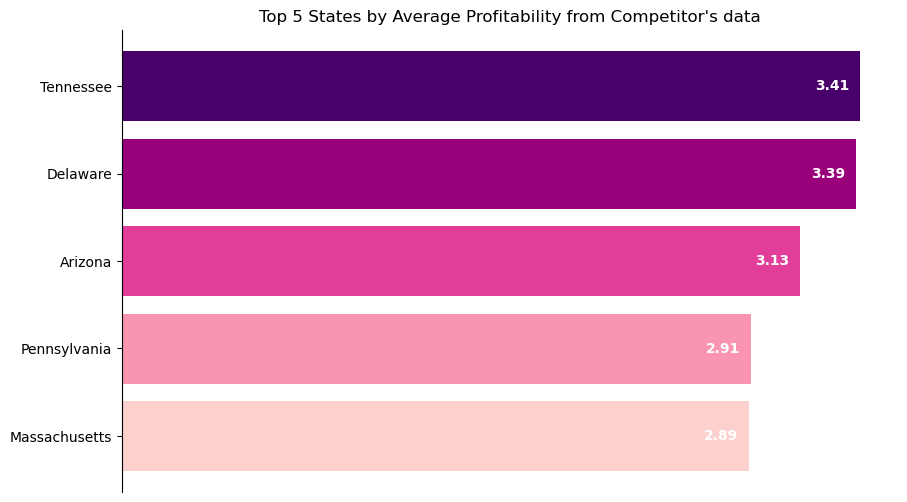

In [25]:
# Create Data
# sort states by profitability column
profitability= df_comp.groupby('state_usa')['profitability'].mean().to_frame().reset_index()
profitability_sorted = profitability.sort_values(by = "profitability", ascending = False)
top5_profitability = profitability_sorted.head(5)

# Colors
cmap = plt.colormaps['RdPu'].reversed()
max_index = top5_profitability['profitability'].idxmax()
colors = [cmap(i / len(top5_profitability)) if i != max_index else cmap(1.0) for i in range(len(top5_profitability))]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top5_profitability['state_usa'], top5_profitability['profitability'], color=colors)

# plot customization
ax.set_xticks([])
ax.invert_yaxis()
ax.set_title('Top 5 States by Average Profitability from Competitor\'s data')
for edge in ['right', 'bottom', 'top']:
    ax.spines[edge].set_visible(False)

# Data Labels
for bar in bars:
    width = bar.get_width()
    plt.text(width - 0.05, bar.get_y() + bar.get_height() / 2, f'{width:.2f}',
             va='center', 
             ha='right', 
             color='white', 
             fontweight = 'extra bold',)
    
# plt.savefig('images/top5_avg_profitability.png', bbox_inches='tight')
    
plt.show()

According to data from competitors, the states of Tennessee, Delaware, Arizona, Pennsylvania, and Massachusetts had the highest average profits in the sector, with rivals in that state making an average profit of **3.41** times what they invested in running their businesses. However, let's not assume that these states have the *most* potential for company growth.

In the following Illustration, we'll plot the average income of each state to a map to give us an idea of the population's purchasing power and disposable income that may be spend on availing the company's products. We purposely used a map to plot the average income because **Regions** can also play a big part in choosing the right location as some regions has advantages and disadvantage over the other regions.

In [26]:
# Create Data for USA map
shape_path = r'C:\Users\rainb\Documents\Data Analyst Course\Refocus\Final Project\cb_2018_us_state_500k'
shape = gpd.read_file(shape_path)

# if not all(col in market.columns for col in required_columns): #avoid running this again
shape = pd.merge(left = shape, 
                right = market, 
                left_on = 'NAME', 
                right_on = 'state_usa', 
                how = 'left')

if 'profitability' not in shape.columns:
    shape = pd.merge(left = shape, 
                     right = profitability, 
                     left_on = 'NAME', 
                     right_on = 'state_usa', 
                     how = 'left')

In [27]:
# Remove NaN -- mostly not recognized states
shape = shape[~shape['average_income'].isna() == True]

In this code, we included an 'ignore' to the warning that will appear later when we plot the boundaries and fill to the map. We also removed `Alaska`, `Hawaii` and `Puerto Rico` from this plot due to their geographical location. But later we'll try to figure out if expanding to those states can be worth considering.

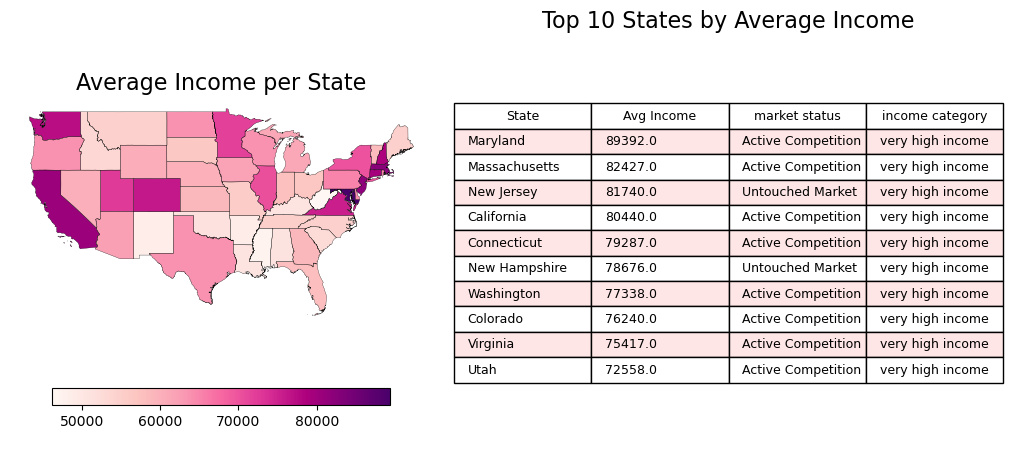

In [28]:
# Shapely warning
warnings.filterwarnings("ignore", message="The 'type' attribute is deprecated")

# Removing Alaska Hawaii and Puerto Rico
continental_america = shape[~shape['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]

# Figure and Axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plots: Boundary lines and fill
boundary = continental_america.boundary.plot(ax = ax1, edgecolor = 'black',
                                       linewidth = 0.2, 
                                       figsize = (10,6))
continental_america.plot(ax = ax1, 
                         column = 'average_income', 
                         cmap = 'RdPu', 
                         legend = True, legend_kwds = {'shrink' : 0.8, 
                                                       'orientation': 'horizontal' })
# Axis 1 config
ax1.set_title("Average Income per State", fontsize = 16)
ax1.axis('off')
for edge in ['right', 'bottom', 'top', 'left']:
    ax1.spines[edge].set_visible(False)


# Create Table Data
sorted_data = continental_america.sort_values('average_income', ascending=False)
top_10_data = sorted_data.head(10)
table_data = top_10_data[['NAME', 'average_income', 'market_status', 'income_category']].values
col_labels = ['State', 'Avg Income', 'market status', 'income category']
table = ax2.table(cellText=table_data,
                 colLabels=col_labels,
                 cellLoc='left',
                 loc='center',)

# Table properties
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.3, 1.7)

# Axis 2 config
ax2.axis('off')

# Alternating Color for the Table
colors = ['#ffe6e6', 'white']
for i in range(0, len(table_data)):
    for j in range(len(col_labels)):
        table[(i + 1), j].set_facecolor(colors[i % 2])

plt.title("Top 10 States by Average Income", fontsize = 16)
plt.subplots_adjust(top=0.8)

# plt.savefig('images/avg_income_map.png', bbox_inches='tight')

plt.show();


The states with the highest average income are typically located on the *western* and *eastern* coast of the continent. Among these, we ranked the `TOP 10 States` according to their average income. The table also shows the market status or simply if the state has a competitor or not. There are states such as **New Jersey** and **New Hampshire** that are categorized as 'very high income' BUT remains Untouched -- or **NO COMPETITORS** in the state. For this reason, we'll consider them as potential location for the company's business expansion. Let's explore a bit more.

### Alaska and Hawaii
Before we dive more into the data and see things about states with or without competitors, let's discuss about states that were previously excluded from the map. In this section, we'll try to find reasons whether or not it's worthy to consider these states.

In [29]:
# Create data for both alaska and hawaii
excluded_from_map = df_comp[df_comp['state_usa'].isin(['Alaska', 'Hawaii', 'Puerto Rico'])]\
        [['state_usa', 
          'average_income', 
          'convictions_per_capita', 
          'profitability',
         ]]
alaska_hawaii = excluded_from_map.groupby('state_usa')[['average_income','profitability', 'convictions_per_capita']].mean()
alaska_hawaii

,average_income,profitability,convictions_per_capita
state_usa,,,
Alaska,76440.0,2.328000,1.06
Hawaii,78084.0,1.443333,0.43


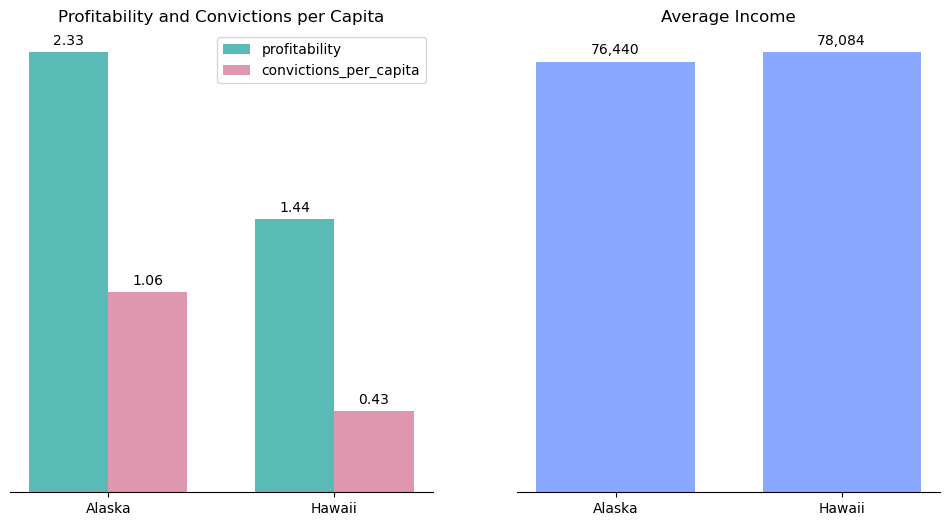

In [30]:
# Labels and locator
labels = alaska_hawaii.index
x_labels = np.arange(len(alaska_hawaii))

# Settings
width = 0.35
color = ['#DE97AE', '#5ABAB5']

# Plot and Axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Clustered Column plot (Axis 1) - we want to show profitability and convictions per capita of both states
profitability = ax1.bar(x_labels - width/2, 
                       alaska_hawaii.values[:, 1], 
                       label=alaska_hawaii.columns[1], 
                       width = width, 
                       color = color[1])

convictions = ax1.bar(x_labels + width/2, 
                     alaska_hawaii.values[:, 2], 
                     label=alaska_hawaii.columns[2], 
                     width = width, 
                     color = color[0])

# Annotations
for i in profitability:
    height = i.get_height()
    ax1.annotate(f'{height:.2f}', xy=(i.get_x() + i.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

for i in convictions:
    height = i.get_height()
    ax1.annotate(f'{height:.2f}', xy=(i.get_x() + i.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

# axis 1 configs
ax1.set_title('Profitability and Convictions per Capita')
ax1.set_xticks(x_labels)
ax1.set_xticklabels(labels)
ax1.legend()
ax1.yaxis.set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Axis 2
# Settings
width = 0.7
color = '#8AA8FF'

# Plot for Axis 2, bar plot of average income of both states
# Separated this because of the significant difference in values of the first axis to this axis
avg_income = ax2.bar(alaska_hawaii.index, 
                     alaska_hawaii['average_income'].values, 
                     data = alaska_hawaii, 
                     width = width,
                     color = color,)
# Annotations
for i in avg_income:
    height = i.get_height()
    ax2.annotate(f'{height:,.0f}', xy=(i.get_x() + i.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom')

# axis 2 configs
ax2.set_title('Average Income')
ax2.set_xticks(x_labels)
ax2.set_xticklabels(labels)
ax2.yaxis.set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

# plt.savefig('images/alaska_hawaii.png', bbox_inches='tight')

plt.show()

These states, considering their geographical locations, can be quite challenging to expand into. Both the states belong to the 'very high income' category so this might add a point in considering them for business expansion. Let's now take a look at their convictions per capita, both are low but doesn't necessarily mean that there are less corruptions in those states. To give us an idea if the company's business will thrive in these states, we look into their profitability. **Hawaii** sits around `1.4` while **Alaska** has around `2.3`. With this in mind, we're thinking that expanding the company's business to **Hawaii is not a good choice**, not only because these computed average profitability will change as the company enter the competition, but also there might be a time that the overhead costs might outweigh the extra **~0.4** from the profits. Alaska on the other hand, is worth considering, but the company should be mindful of other factors aside from geographical location such as Talent acquisition, Cost of Living, etc.

### States with Active Competition
On the context of **Growth of a Company**, based on the data that we have, the first one we consider in this analysis is the profitability or asking the question *is the company going to thrive in this state?*. So in the following analysis, we'll be looking for states that will potentially give the company at least double of what they spent.

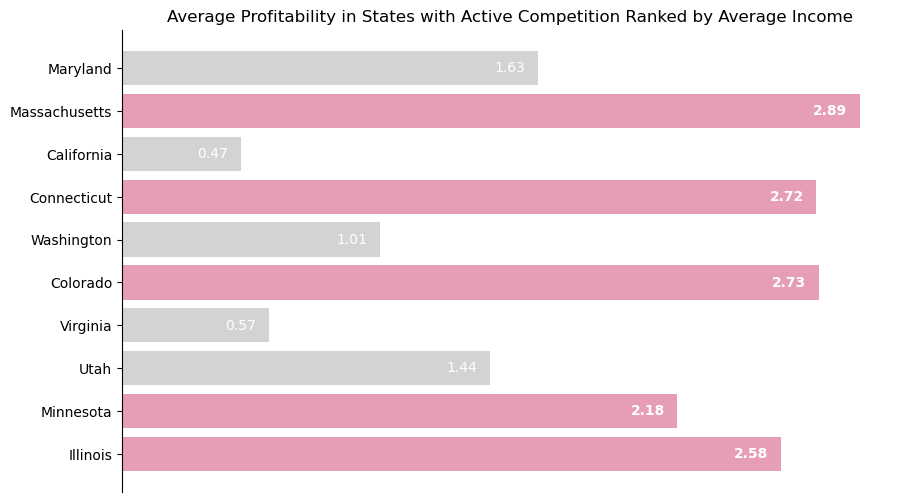

In [31]:
# Create Data for Market with Competition
top10_income_active = (sorted_data[sorted_data['market_status']=="Active Competition"]).head(10)

# Color scheme, we're looking for profitability of at least 2.0
cmap = ['#E69EB5' if p > 2 else 'lightgray' for p in top10_income_active['profitability']]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top10_income_active['NAME'], top10_income_active['profitability'], color=cmap)

# axis configs
ax.set_xticks([])
ax.invert_yaxis()
ax.set_title('Average Profitability in States with Active Competition Ranked by Average Income')
for edge in ['right', 'bottom', 'top']:
    ax.spines[edge].set_visible(False)

# Data Labels
for bar, profitability in zip(bars, top10_income_active['profitability']):
    width = bar.get_width()
    font_weight = 'extra bold' if profitability > 2 else 'normal'
    plt.text(width - 0.05, bar.get_y() + bar.get_height() / 2, f'{width:.2f}',
             va='center', 
             ha='right', 
             color='white', 
             fontweight = font_weight,)
    
# plt.savefig('images/active_competition.png', bbox_inches='tight')
    
plt.show()

From the 10 states with highest income, we find all the states with competitors making at least double of their expenses. These are **Massachusetts, Connecticut, Colorado, Minnesota, and Illinois**, with **Massachusetts** having the highest of `2.89`. Now that we know our target states, let's explore how well our competitors in each state might be.

In [32]:
# Creating a list of states with profitability of greater than 2
a = top10_income_active[top10_income_active['profitability'] > 2][['NAME']]
profitability_2 = list(a['NAME'].values)

# Filtering out competitor data of states stored in the list profitability_2
competitors = df_comp[df_comp['state_usa'].isin(profitability_2)].sort_values('state_usa')
competitors['market_share'] = competitors['profit'] / competitors.groupby('state_usa')['profit'].transform('sum') * 100

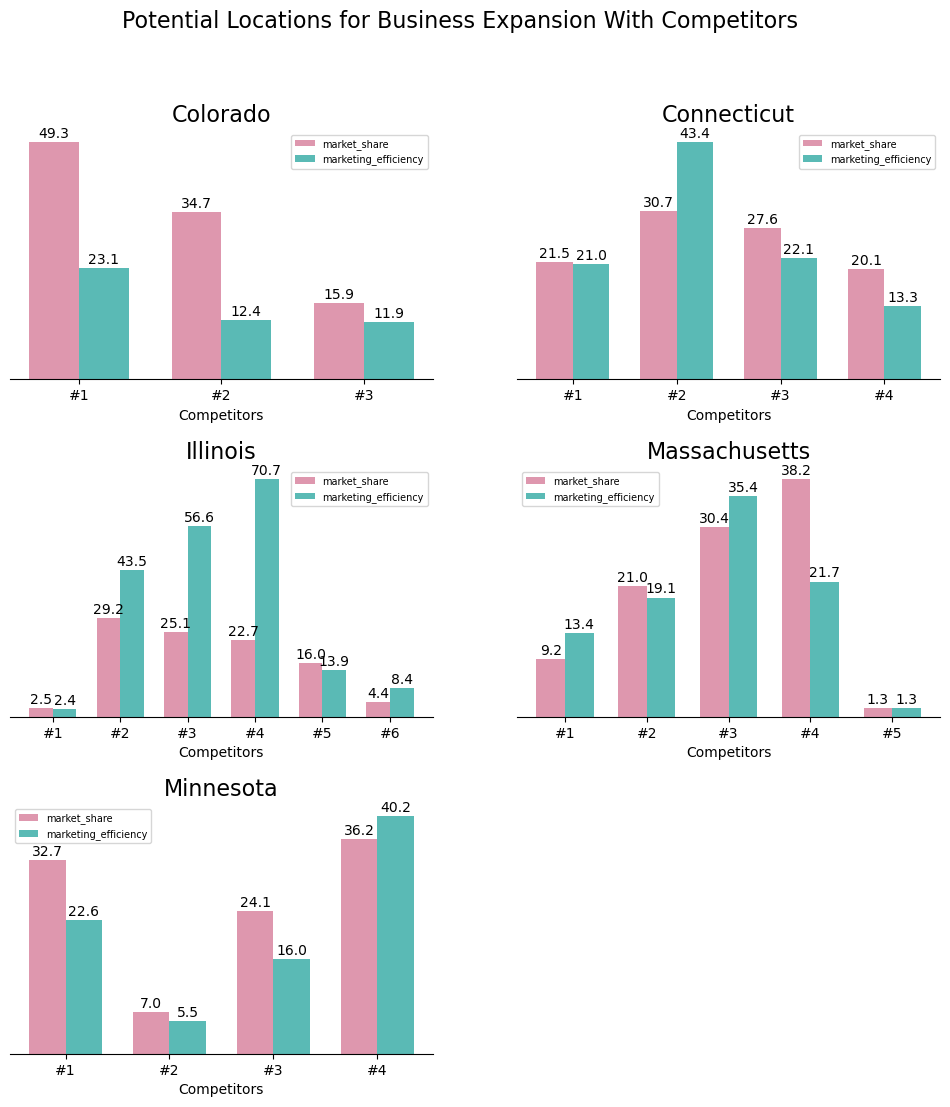

In [33]:
# Whole Figure
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 12))
fig.suptitle('Potential Locations for Business Expansion With Competitors', fontsize=16, ha='center')

# Settings
fig.subplots_adjust(hspace=0.35)
width = 0.35
color = ['#DE97AE', '#5ABAB5']  #pink, teal
fontsize = 11
fontweight = 'bold'
title_size = 16

# data filters
colorado_f = competitors[competitors['state_usa']=='Colorado'][['market_share', 'marketing_efficiency']]
connecticut_f = competitors[competitors['state_usa']=='Connecticut'][['market_share', 'marketing_efficiency']]
illinois_f = competitors[competitors['state_usa']=='Illinois'][['market_share', 'marketing_efficiency']]
massachusetts_f = competitors[competitors['state_usa']=='Massachusetts'][['market_share', 'marketing_efficiency']]
minnesota_f = competitors[competitors['state_usa']=='Minnesota'][['market_share', 'marketing_efficiency']]

# Locator
co_labels = np.arange(len(colorado_f))
cn_labels = np.arange(len(connecticut_f))
il_labels = np.arange(len(illinois_f))
ma_labels = np.arange(len(massachusetts_f))
mn_labels = np.arange(len(minnesota_f))

# List of values
co = colorado_f['market_share'].to_list()
co_me = colorado_f['marketing_efficiency'].to_list()
cn = connecticut_f['market_share'].to_list()
il = illinois_f['market_share'].to_list()
ma = massachusetts_f['market_share'].to_list()
mn = minnesota_f['market_share'].to_list()

# Plots of each State
co_market_share = ax1.bar(co_labels - width/2, 
                          colorado_f.values[:, 0], 
                          label=colorado_f.columns[0], 
                          width = width, 
                          color = color[0])

co_mktg_efficiency = ax1.bar(co_labels + width/2, 
                             colorado_f.values[:, 1], 
                             label=colorado_f.columns[1], 
                             width = width, 
                             color = color[1])

cn_market_share = ax2.bar(cn_labels - width/2,
                          connecticut_f.values[:, 0],
                          label=connecticut_f.columns[0], 
                          width = width, 
                          color = color[0])

cn_mktg_efficiency = ax2.bar(cn_labels + width/2, 
                             connecticut_f.values[:, 1], 
                             label=connecticut_f.columns[1], 
                             width = width, 
                             color = color[1])

il_market_share = ax3.bar(il_labels - width/2,
                          illinois_f.values[:, 0],
                          label=connecticut_f.columns[0], 
                          width = width, 
                          color = color[0])

il_mktg_efficiency = ax3.bar(il_labels + width/2, 
                             illinois_f.values[:, 1], 
                             label=illinois_f.columns[1], 
                             width = width, 
                             color = color[1])

ma_market_share = ax4.bar(ma_labels - width/2,
                          massachusetts_f.values[:, 0],
                          label=massachusetts_f.columns[0], 
                          width = width, 
                          color = color[0])

ma_mktg_efficiency = ax4.bar(ma_labels + width/2, 
                             massachusetts_f.values[:, 1], 
                             label=massachusetts_f.columns[1], 
                             width = width, 
                             color = color[1])

mn_market_share = ax5.bar(mn_labels - width/2,
                          minnesota_f.values[:, 0],
                          label=minnesota_f.columns[0], 
                          width = width, 
                          color = color[0])

mn_mktg_efficiency = ax5.bar(mn_labels + width/2, 
                             minnesota_f.values[:, 1], 
                             label=minnesota_f.columns[1], 
                             width = width, 
                             color = color[1])

# Annotations
for i in co_market_share:
    height = i.get_height()
    ax1.annotate(f'{height:.1f}', xy=(i.get_x() + i.get_width() / 2, height),
                xytext=(0, 1), textcoords="offset points",
                ha='center', va='bottom')

for i in co_mktg_efficiency:
    height = i.get_height()
    ax1.annotate(f'{height:.1f}', xy=(i.get_x() + i.get_width() / 2, height),
                xytext=(0, 1), textcoords="offset points",
                ha='center', va='bottom')

for i in cn_market_share:
    height = i.get_height()
    ax2.annotate(f'{height:.1f}', xy=(i.get_x() + i.get_width() / 2, height),
                xytext=(0, 1), textcoords="offset points",
                ha='center', va='bottom')

for i in cn_mktg_efficiency:
    height = i.get_height()
    ax2.annotate(f'{height:.1f}', xy=(i.get_x() + i.get_width() / 2, height),
                xytext=(0, 1), textcoords="offset points",
                ha='center', va='bottom')

for i in il_market_share:
    height = i.get_height()
    ax3.annotate(f'{height:.1f}', xy=(i.get_x() + i.get_width() / 2, height),
                xytext=(0, 1), textcoords="offset points",
                ha='center', va='bottom')

for i in il_mktg_efficiency:
    height = i.get_height()
    ax3.annotate(f'{height:.1f}', xy=(i.get_x() + i.get_width() / 2, height),
                xytext=(0, 1), textcoords="offset points",
                ha='center', va='bottom')

for i in ma_market_share:
    height = i.get_height()
    ax4.annotate(f'{height:.1f}', xy=(i.get_x() + i.get_width() / 2, height),
                xytext=(0, 1), textcoords="offset points",
                ha='center', va='bottom')

for i in ma_mktg_efficiency:
    height = i.get_height()
    ax4.annotate(f'{height:.1f}', xy=(i.get_x() + i.get_width() / 2, height),
                xytext=(0, 1), textcoords="offset points",
                ha='center', va='bottom')

for i in mn_market_share:
    height = i.get_height()
    ax5.annotate(f'{height:.1f}', xy=(i.get_x() + i.get_width() / 2, height),
                xytext=(0, 1), textcoords="offset points",
                ha='center', va='bottom')

for i in mn_mktg_efficiency:
    height = i.get_height()
    ax5.annotate(f'{height:.1f}', xy=(i.get_x() + i.get_width() / 2, height),
                xytext=(0, 1), textcoords="offset points",
                ha='center', va='bottom')

# axis 1 configs
ax1.set_title('Colorado', fontsize = title_size)
ax1.set_xticks(np.arange(len(co)))
ax1.set_xticklabels([f'#{item_idx + 1}' for item_idx in range(len(co))])
ax1.set_xlabel('Competitors')
ax1.legend(fontsize = 7)
ax1.yaxis.set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

# axis 2 configs
ax2.set_title('Connecticut', fontsize = title_size)
ax2.set_xticks(np.arange(len(cn)))
ax2.set_xticklabels([f'#{item_idx + 1}' for item_idx in range(len(cn))])
ax2.set_xlabel('Competitors')
ax2.legend(fontsize = 7)
ax2.yaxis.set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)

# axis 3 configs
ax3.set_title('Illinois', fontsize = title_size)
ax3.set_xticks(np.arange(len(il)))
ax3.set_xticklabels([f'#{item_idx + 1}' for item_idx in range(len(il))])
ax3.set_xlabel('Competitors')
ax3.legend(fontsize = 7)
ax3.yaxis.set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_visible(False)

# axis 4 configs
ax4.set_title('Massachusetts', fontsize = title_size)
ax4.set_xticks(np.arange(len(ma)))
ax4.set_xticklabels([f'#{item_idx + 1}' for item_idx in range(len(ma))])
ax4.set_xlabel('Competitors')
ax4.legend(fontsize = 7)
ax4.yaxis.set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_visible(False)

# axis 5 configs
ax5.set_title('Minnesota', fontsize = title_size)
ax5.set_xticks(np.arange(len(mn)))
ax5.set_xticklabels([f'#{item_idx + 1}' for item_idx in range(len(mn))])
ax5.set_xlabel('Competitors')
ax5.legend(fontsize = 7,)
ax5.yaxis.set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.spines['left'].set_visible(False)

# Hiding axis 6, size of the figure is 3X2
ax6.set_title('')
ax6.xaxis.set_visible(False)
ax6.yaxis.set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.spines['left'].set_visible(False)
ax6.spines['bottom'].set_visible(False)

# plt.savefig('images/competitors_each_state.png', bbox_inches='tight')

plt.show()

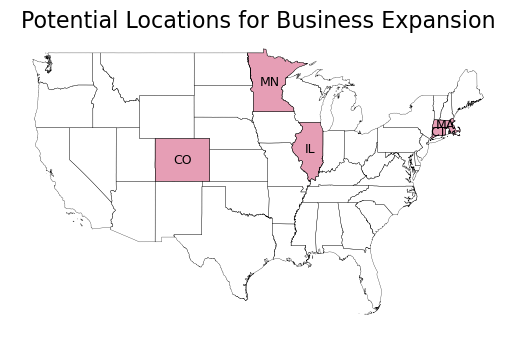

In [34]:
# Create data for the map
potential_locations = continental_america['NAME'].isin(['Massachusetts', 'Connecticut', 'Colorado', 'Minnesota', 'Illinois'])

# Plot
fig, ax = plt.subplots()

# Plotting boundaries of each states
continental_america.boundary.plot(ax = ax, 
                                             edgecolor = 'black',
                                             linewidth = 0.2,
                                             color = 'black',
                                             figsize = (10,6))

# Fill only those that are in potential_locations
continental_america.loc[potential_locations].plot(ax = ax, 
                                                  color = '#E69EB5',
                                                  edgecolor = 'black',
                                                  linewidth = 0.2,)

# axis configs
ax.set_title("Potential Locations for Business Expansion", fontsize = 16)
ax.axis('off')
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False);

# Annotations using abreviations of potential locations
abrev_potential = ['MA', 'CT', 'CO', 'MN', 'IL']
for idx, row in continental_america.iterrows():
    abbreviation = row['STUSPS']
    if abbreviation in abrev_potential:
        centroid = row['geometry'].centroid
        ax.annotate(abbreviation, (centroid.x, centroid.y), ha='center', va='center', fontsize = 9)
        
# plt.savefig('images/potential_state_comp.png', bbox_inches='tight')

plt.show()

#### Analysis of Each Potential State with Competitors
<br>

* Colorado (WEST)
>    In this state, the half of the market is occupied by a competitor and the other half is shared by the other two. There are only 3 competitors so entering to the competition is viable. When we look on each competitor's marketing efficiency, we can see that all of them are not totally heavy on marketing. This means that there is a room for improvement and this might be the weak point of the other competitors if the company decides to choose this state. Another thing, this state is the closest to the current location of the company. Also closer to Silicon Value which can be a source of the company's innovation and other materials.
    
* Connecticut (NORTH-EAST)
>    The data shows us a relatively close range, of only 20% ~ 30%, between market share of each competitors. There are 4 competitors in this state but we can see that the competitor with the highest market share also spends heavy on marketing. This can be a reason why they acquired that position in the market. If the company decides to choose Connecticut, it's a good thing to know that customer acquisition through marketing is worth it in this state. Connecticut belongs to densely populated regions and neighbor to major cities such as New York and Boston could potentially benefit the company in talent acquisition. However, take note that Northern region has stricter regulations and higher taxes.
<br>

* Illinois (MID-WESTERN)
>    The data tells us that the competition in this state is highly active. With 6 competitors, we can see that most of them is battling with other through their marketing. Although what they're doing is working and they're acquiring profits by it, it might not be the case on acquiring more market share. One good thing to remember, even though some competitors has a terribly low market share, competitors in this state still averages about 2.5 by profitability. Compared to other regions, there is a lower cost of living in Illinois but the population is smaller.
<br>

* Massachusetts (NORTH-EAST)
>    The company is going to be the sixth to enter the competition if it decides to do so. Like Connecticut, marketing is seen to impact more on acquiring market share. The competitor with the most market share doesn't spend as much as the second one on marketing, so the second one has gained market share close to the top competitor. The company, if it decides to enter the competition, could do the same in order for it to be successful in the industry. Being also in the Northern region of the country, it has the same pros and cons as Connecticut. Climate can also be a challenge to Northern regions as colder climates can incur additional costs.
<br>

* Minnesota (MID-WESTERN)
>    The competition in this state is somewhat similar to that of Connecticut; 4 competitors, spending on marketing is worth it. But unlike Connecticut, Minnesota doesn't have an adjacent state where competition is also strong. Looking at Massachusetts, there is a competitor that has a very low market share. If they're to conduct a similar study to this, they might also find that expanding into their neighboring state can give them a better position in the competition. Minnesota doesn't have that. Just like Illinois, cost of living here is low and access to major transportation lines are available.
    

With the comparison of these states, few things should be kept in mind:

* Whichever state the company will be choosing, **marketing** should remain the priority especially when entering into a new market competition.
* Although these 5 states has their own weakness, we must remember that the average profitability in them is more than 2.0. 
* Considering how a particular region might impact the business operation should also be looked into.

Now let's take a look on the potential states with zero competitors

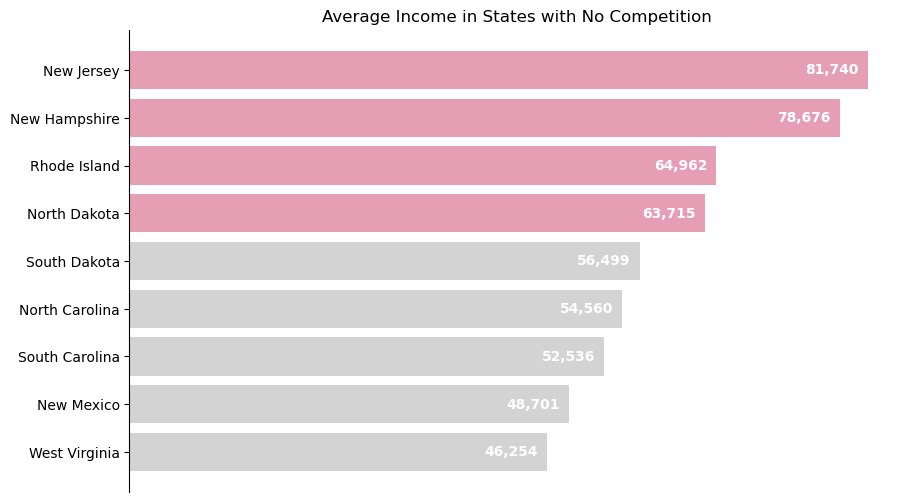

In [35]:
# Create Data for Market with NO COMPETITION
top10_untouched = (sorted_data[sorted_data['market_status']=="Untouched Market"]).head(10)

# Color scheme, we're looking for states with average income > quartile[0.5]
cmap = ['#E69EB5' if p > income_cat[0.5] else 'lightgray' for p in top10_untouched['average_income']]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top10_untouched['NAME'], top10_untouched['average_income'], color=cmap)

# Axis config
ax.set_xticks([])
ax.invert_yaxis()
ax.set_title('Average Income in States with No Competition')
for edge in ['right', 'bottom', 'top']:
    ax.spines[edge].set_visible(False)

# Data Labels
for bar in bars:
    width = bar.get_width()
    plt.text(width - 1000, bar.get_y() + bar.get_height() / 2, f'{width:,.0f}',
             va='center', 
             ha='right', 
             color='white', 
             fontweight = 'extra bold',)
    
# plt.savefig('images/no_competition.png', bbox_inches='tight')
    
plt.show()

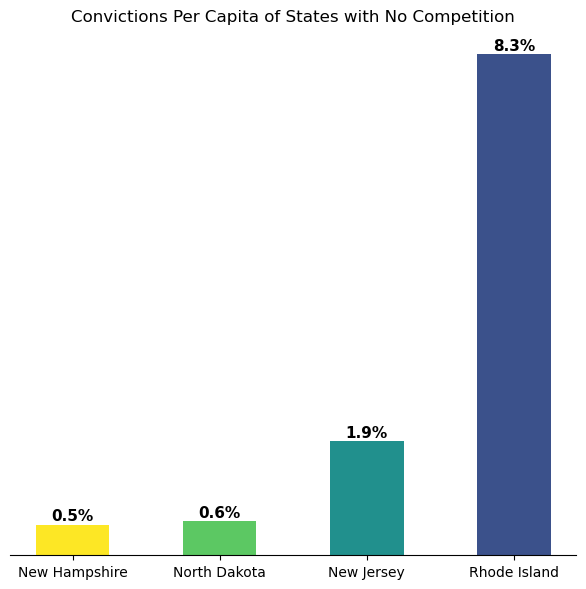

In [36]:
# Create data for states with 'very high income' and no competition
inactive_market = top10_untouched[top10_untouched['average_income'] > income_cat[0.5]].sort_values('convictions_per_capita')
inactive_market_states = list(inactive_market['NAME'].values)
data = market[market['state_usa'].isin(inactive_market_states)].sort_values('convictions_per_capita')

# Whole Figure
fig, ax = plt.subplots(figsize = (6,6))

# Settings
width = 0.5
fontsize = 11
fontweight = 'bold'
title_size = 16

# Labels and Locators
labels_2 = inactive_market_states
x_labels = np.arange(len(data))

# Color
cmap = plt.colormaps['viridis'].reversed()
max_index = data['convictions_per_capita'].idxmax()
color = [cmap(i / len(data)) if i != max_index else cmap(1.0) for i in range(len(data))]

# Plots
inactive_mrkt_convictions = ax.bar(x_labels, 
                     height = data.values[:,2], 
                     data = data, 
                     width = width,
                     color = color,)

# Annotations
for i in inactive_mrkt_convictions:
    height = i.get_height()
    ax.annotate(f'{height:,.1f}%', 
                 xy=(i.get_x() + i.get_width() / 2, height), 
                 xytext=(0, 1), 
                 textcoords="offset points", 
                 ha='center', 
                 va='bottom',
                 fontsize = fontsize,
                 fontweight = fontweight)

# axis configs
ax.set_title('Convictions Per Capita of States with No Competition')
ax.set_xticks(x_labels)
ax.set_xticklabels(labels_2)
ax.yaxis.set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()

# plt.savefig('images/cpc_no_competitions.png', bbox_inches='tight')

plt.show()

#### Analysis of Each Potential State with No Competitors
<br>

* New Hampshire (NORTH-EAST)
>    A state with high income, low corruption convictions per capita, and no competition. This is an ideal conditions for a company to enter the market. Just like the other potential states, we also must consider the challenges that can and will be faced by the company upon entering the market. One is that as we talked about, Northern regions has higher taxes, stricter regulations and has colder climate. On the good side, this part of the country has dense population meaning the market is bigger. Another thing, because Massachusetts has such a competitive market, there is a chance that some of the competitors there will expand to their neighbor, New Hampshire.
<br>
    
* North Dakota (MID-WEST)
>    The same conditions with New Hampshire but on different region. North Dakota is a Mid-Western state so we can expect a lower cost of living and a smaller market size. There's no competition so a smaller market size, unless the company has a target size, won't be that much of a problem. Its neighboring state, Minnesota, only has 4 competitors and with a small market size, the risk of these competitors expanding to North Dakota is low. If the company is looking to expand to a state without having to worry about competitors, North Dakota is a big candidate.
<br>

* New Jersey (NORTH-EAST)
>    New Jersey is another state with, despite of being in a region with dense population, has no competitors. It has a higher convictions per capita compared to New Hampshire but this state has the highest average income among all states with no competitors. Larger market size, higher average income and zero competition makes it one of the best choices for the company's expansion.
<br>

* Rhode Island (NORTH-EAST)
>    Although Rhode Island has a decent average income and belong to a region with large market size, no competitors are present in this state. This is probably due to its very high convictions per capita. This can mean that even though the criminals are prosectuted, there is a significant difference between the amount of corruptions in this state and other states. For that regard, we also **will not recommend** expanding to this state.


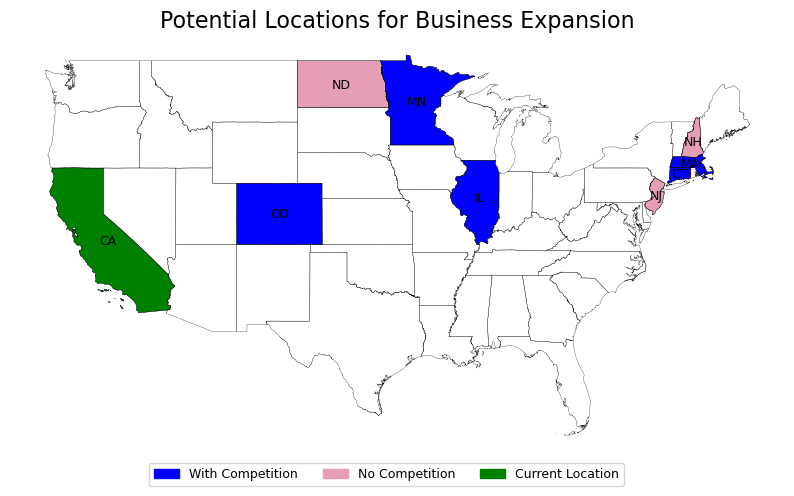

In [37]:
# Create Data for this plot
no_competition = continental_america['NAME'].isin(['New Hampshire', 'North Dakota', 'New Jersey'])
initial_location = continental_america['NAME'].isin(['California'])

# Figure and axis
fig, ax = plt.subplots(figsize = (10,10))

# Plot of boundaries
continental_america.boundary.plot(ax = ax, 
                                  edgecolor = 'black', 
                                  linewidth = 0.2, 
                                  color = 'black', 
                                  figsize = (10,6))

# Plot of each potential locations and current location
continental_america.loc[no_competition].plot(ax = ax, 
                                                  color = '#E69EB5',
                                                  edgecolor = 'black',
                                                  linewidth = 0.2,)

continental_america.loc[potential_locations].plot(ax = ax, 
                                                  color = 'Blue',
                                                  edgecolor = 'black',
                                                  linewidth = 0.2,)

continental_america.loc[initial_location].plot(ax = ax, 
                                                  color = 'Green',
                                                  edgecolor = 'black',
                                                  linewidth = 0.2,)

# Axis configs
ax.set_title("Potential Locations for Business Expansion", fontsize = 16)
ax.axis('off')
for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False);

# Custom Legends -- since we did not create separate dataframe to plot them
legend_handles = [mpatches.Patch(color='blue', label='With Competition'), 
                  mpatches.Patch(color='#E69EB5', label='No Competition'), 
                  mpatches.Patch(color='Green', label='Current Location')
                 ]
legend_labels = ['With Competition', 'No Competition', 'Current Location']

# legend configs
plt.legend(legend_handles, 
           legend_labels, 
           loc='upper right', 
           bbox_to_anchor=(0.8, -0.005), 
           ncol=len(legend_handles),
           fontsize = 9)

# Annotations
abrev_potential = ['NH', 'ND', 'NJ', 'MA', 'CT', 'CO', 'MN', 'IL', 'CA']
for idx, row in continental_america.iterrows():
    abbreviation = row['STUSPS']
    if abbreviation in abrev_potential:
        centroid = row['geometry'].centroid
        ax.annotate(abbreviation, (centroid.x, centroid.y), ha='center', va='center', fontsize = 9)

# plt.savefig('images/Continental_America.png', bbox_inches='tight')

plt.show()

### Summary

This map shows all the potential locations the company could choose from. The decision by the company should be based depending on their priority:
* Distance from Manufacturers, Logistics Considerations
* Distance from Innovation Hub, Tech institutions
* Large Market Size, No Competition, Unkown Profitability, High Cost of Living
>    * **New Jersey**
        * Very High average income
        * Low corruptions per capita (1.9%)
        * North-eastern Region
>    * **New Hampshire**
        * Very High average income
        * Low corruptions per capita (0.5%)
        * North-eastern Region
<br>        
* Large Market Size, with Competition, High Profitability,  High Cost of Living
>    * **Massachusetts**
        * Very High average income
        * North-eastern Region
        * 5 competitors, has 1.5% ~ 38% market share
>    * **Connecticut**
        * Very High average income
        * North-eastern Region
        * 4 competitors, has 20% ~ 30% market share

<br>


* Smaller Market Size, No Competition, Unknown Profitability, Lower Cost of living
>    * **North Dakota**
        * Very High average income
        * Mid-Western Region
        * 4 competitors, has 7% ~ 36% market share
        
<br>

* Smaller Market Size, with Competition, High Profitability, Lower Cost of living
>    * **Minnesota**
        * Very High average income
        * Mid-Western Region
        * 4 competitors, has 7% ~ 36% market share
>    * **Colorado**
        * Very High average income
        * West Region
        * 3 competitors, has 15% ~ 39% market share
        * Closest to California (current location)
>    * **Illinois**
        * Very High average income
        * Mid-Western Region
        * 3 competitors, has 2.5% ~ 29% market share

Why aren't the top 4 states with the highest profitability not in the selection? When we look at their average income, they're categorized as 'High Income' so going into competition in these states could potentially reduce the profitability and it will be more risky than going into lower average profitability with a larger average income. 

### Challenges during the analysis

* The data we worked on is limited to only average, minimum and maximum. It would be better if we are provided with data describing how much of the income of the state is allocated to health or purchasing tech gadgets such as one that is provided by the company.
<br>

* We have no data of how much it would cost a company to operate in a certain state. This would greatly help choosing the right state especially for a startup company. The regional analysis we made is based on our own research.
<br>

* The competitor's data is also lacking of details that would describe how big a company is, so we could better asses why they have certain market share. It could also be used to compare why a certain company spends more in marketing and why the others are not.


### Recommendations for future studies

* Gather information on the cost of living, operational costs, and talent availability in each state. These are a few of the elements that will have a significant impact on how a new firm develops.
<br>

* Obtain more information about the market performance of the rivals. This will reveal their weaknesses, which the corporation may then use to its advantage to win the competition.
<br>

* Distances between each significant stage of the business workflow will be necessary. We don't want to spend too much money as a new business buying a component from another part of the world. Here, we're aiming for effectiveness.
<br>

* To further narrow down our lists of suitable states for business expansion, regulations, taxes, labor costs, and overhead costs should be researched. 